# Drowsiness Detection

## Dependencies

In [3]:
%pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [12]:
!cd yolov5 & pip install -r requirements.txt

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)

   ---------------------------------------- 0/6 [smmap]
  Attempting uninstall: setuptools
   ---------------------------------------- 0/6 [smmap]
    Found existing installation: setuptools 65.5.0
   ---------------------------------------- 0/6 [smmap]
   ------ --------------------------------- 1/6 [setuptools]
   ------ --------------------------------- 1/6 [setuptools]
    Uninstalling setuptools-65.5.0:
   ------ --------------------------------- 1/6 [setuptools]
   ------ --------------------------------- 1/6 [setuptools]
   ------ --------------------------------- 1/6 [setuptools]
   ------ --------------------------------- 1/6 [setuptools]
   ------ --------------------------------- 1/6 [setuptools]
   ------ --------------------------------- 1/6 [setuptools]
   ------ --------------------------------- 1/6 [setuptools]
   ------ -------------------------

In [21]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Load Model YOLOv5

In [15]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\Users\prath\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\prath/.cache\torch\hub\master.zip


C:\Users\prath/.cache\torch\hub\ultralytics_yolov5_master\utils\general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
YOLOv5  2025-7-17 Python-3.10.11 torch-2.7.1+cpu CPU

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:05<00:00, 2.48MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [16]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make detections

In [18]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [19]:
results = model(img)
results.print()

C:\Users\prath/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 1380.4ms pre-process, 519.9ms inference, 25.1ms NMS per image at shape (1, 3, 384, 640)


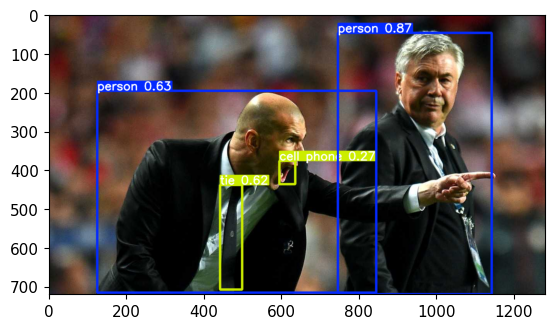

In [25]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

## Real time detection

In [36]:
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()

    #make our detection
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'list' object has no attribute 'render'

## set data

In [ ]:
# 1) Paths & parameters
src_root    = "/content/driver-drowsiness/Driver Drowsiness Dataset (DDD)"
out_root    = "/content/driver-drowsiness-split"
classes     = ["Drowsy", "Non Drowsy"]
train_ratio = 0.8
seed        = 42

# 2) Make dirs
for split in ["train", "val"]:
    for cls in classes:
        os.makedirs(os.path.join(out_root, split, cls), exist_ok=True)

# 3) Split
random.seed(seed)
for cls in classes:
    cls_src = os.path.join(src_root, cls)
    files   = [f for f in os.listdir(cls_src) if f.lower().endswith((".jpg", ".png"))]
    random.shuffle(files)
    split_i = int(len(files) * train_ratio)
    train_files, val_files = files[:split_i], files[split_i:]

    for fname in train_files:
        shutil.copy2(os.path.join(cls_src, fname),
                     os.path.join(out_root, "train", cls, fname))
    for fname in val_files:
        shutil.copy2(os.path.join(cls_src, fname),
                     os.path.join(out_root, "val",   cls, fname))

## Load Model YOLO11s-cls

In [2]:
from ultralytics import YOLO 
model = YOLO("yolo11n-cls.pt")  # using nano to reduce size

100%|█████████████████████████████████████████████████████████████████████████████| 5.52M/5.52M [00:00<00:00, 35.6MB/s]


## train YOLO11s-cls model on drowsy data

In [ ]:
results = model.train(
    data="data",                    #cpoints to ML/data.yaml
    epochs= 15,
    imgsz=224,
    batch= 32,
    cache=True,        # enable cache
    workers=8          # parallel data loading
)

New https://pypi.org/project/ultralytics/8.3.168 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.167  Python-3.10.11 torch-2.7.1+cpu CPU (13th Gen Intel Core(TM) i7-13700H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=a

train: Scanning C:\Users\prath\ML\Drowsiness_Detection\data\train... 33434 images, 0 corrupt: 100%|██████████| 33434/33


train: New cache created: C:\Users\prath\ML\Drowsiness_Detection\data\train.cache
WARNING Classification `cache_ram` training has known memory leak in https://github.com/ultralytics/ultralytics/issues/9824, setting `cache_ram=False`.
val: Fast image access  (ping: 0.40.2 ms, read: 47.210.3 MB/s, size: 62.5 KB)


C:\Users\prath\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\prath\ML\Drowsiness_Detection\data\val... 8359 images, 0 corrupt: 100%|██████████| 8359/8359 [00


val: New cache created: C:\Users\prath\ML\Drowsiness_Detection\data\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs\classify\train
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


C:\Users\prath\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [03:57<00:00,  1.81s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [03:49<00:00,  1.75s/it]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [03:42<00:00,  1.70s/it]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


       4/15         0G      0.142         32        224:   0%|          | 2/1045 [00:04<39:01,  2.25s/it]

In [3]:
from ultralytics import YOLO
model = YOLO("runs/classify/train/weights/last.pt")

In [4]:
model.train(resume=True, epochs=12)

New https://pypi.org/project/ultralytics/8.3.169 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.167  Python-3.10.11 torch-2.7.1+cpu CPU (13th Gen Intel Core(TM) i7-13700H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs\classify\train\weights\last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimi

train: Scanning C:\Users\prath\ML\Drowsiness_Detection\data\train... 33434 images, 0 corrupt: 100%|██████████| 33434/33


WARNING Classification `cache_ram` training has known memory leak in https://github.com/ultralytics/ultralytics/issues/9824, setting `cache_ram=False`.
val: Fast image access  (ping: 0.30.2 ms, read: 69.536.3 MB/s, size: 62.5 KB)


C:\Users\prath\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\prath\ML\Drowsiness_Detection\data\val... 8359 images, 0 corrupt: 100%|██████████| 8359/8359 [00


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Resuming training runs\classify\train\weights\last.pt from epoch 4 to 15 total epochs
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs\classify\train
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


C:\Users\prath\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [04:12<00:00,  1.93s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [03:58<00:00,  1.82s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


C:\Users\prath\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [03:49<00:00,  1.76s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [03:56<00:00,  1.80s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [03:56<00:00,  1.81s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [04:25<00:00,  2.03s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      10/15         0G    0.01156         26        224: 100%|██████████| 1045/1045 [54:06<00:00,  3.11s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [04:27<00:00,  2.04s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      11/15         0G     0.0064         26        224: 100%|██████████| 1045/1045 [54:12<00:00,  3.11s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [04:27<00:00,  2.04s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      12/15         0G    0.00569         26        224: 100%|██████████| 1045/1045 [54:11<00:00,  3.11s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [04:25<00:00,  2.03s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      13/15         0G   0.004111         26        224: 100%|██████████| 1045/1045 [54:08<00:00,  3.11s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [04:25<00:00,  2.03s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      14/15         0G   0.003271         26        224: 100%|██████████| 1045/1045 [42:19<00:00,  2.43s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [03:28<00:00,  1.59s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      15/15         0G    0.00174         26        224: 100%|██████████| 1045/1045 [37:14<00:00,  2.14s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [03:29<00:00,  1.60s/it]

                   all          1          1



12 epochs completed in 10.234 hours.
Optimizer stripped from runs\classify\train\weights\last.pt, 3.2MB
Optimizer stripped from runs\classify\train\weights\best.pt, 3.2MB

Validating runs\classify\train\weights\best.pt...
Ultralytics 8.3.167  Python-3.10.11 torch-2.7.1+cpu CPU (13th Gen Intel Core(TM) i7-13700H)
YOLO11n-cls summary (fused): 47 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: C:\Users\prath\ML\Drowsiness_Detection\data\train... found 33434 images in 2 classes  
val: C:\Users\prath\ML\Drowsiness_Detection\data\val... found 8359 images in 2 classes  
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 131/131 [03:13<00:00,  1.48s/it]


                   all          1          1
Speed: 0.0ms preprocess, 10.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000014E9EE7D240>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: WindowsPath('runs/classify/train')
speed: {'preprocess': 0.000863620045793525, 'inference': 10.614001256122434, 'loss': 8.242614237489791e-05, 'postprocess': 0.00015676516274892516}
task: 'classify'
top1: 1.0
top5: 1.0

## test ML Model

In [8]:
import uuid
import os
import time
import cv2
from ultralytics import YOLO
import numpy as np
import pandas as pd

In [4]:
import cv2
import numpy as np
from ultralytics import YOLO

model = YOLO("runs/classify/train/weights/best.pt")   # change path
# Find index of "drowsy" class (or just set DROWSY_IDX = 1 if you know it)
DROWSY_IDX = [k for k,v in model.names.items() if v == "drowsy"][0]

THRESH = 0.75

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError("No webcam")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    r = model(frame, imgsz=224, verbose=False)[0]
    p_drowsy = float(r.probs.data[DROWSY_IDX])

    # Text color & optional red tint if over threshold
    if p_drowsy > THRESH:
        # translucent red overlay
        overlay = frame.copy()
        overlay[:] = (0, 0, 255)
        cv2.addWeighted(overlay, 0.25, frame, 0.75, 0, frame)
        text_color = (0, 0, 255)
    else:
        text_color = (0, 255, 0)

    cv2.putText(frame, f"drowsy: {p_drowsy:.2f}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 2)

    cv2.imshow("YOLO", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Compress Model into a TF lite model 

### First im doing an analysis on the total storage size of my current model

In [2]:
import os
path = "runs/classify/train/weights/best.pt"
print(f"{os.path.getsize(path)/1024/1024:.2f} MB")  

3.04 MB


So the current model size is 3.04 MB. lets see how much RAM we are using

In [3]:
import os, psutil, cv2, torch
from ultralytics import YOLO

proc = psutil.Process(os.getpid())
MB = 1024**2
def mem_mb():
    m = proc.memory_full_info()    # has rss + uss; uss ~= truly private bytes
    return m.rss/MB, m.uss/MB

# ---- baseline: Python + OpenCV capture only ----
cap = cv2.VideoCapture(0)
rss0, uss0 = mem_mb()
print(f"Baseline (rss/uss): {rss0:.1f}/{uss0:.1f} MB")

# ---- load model ----
torch.set_grad_enabled(False)
model = YOLO("runs/classify/train/weights/best.pt")
rss1, uss1 = mem_mb()
print(f"After model load:   {rss1:.1f}/{uss1:.1f} MB  (+{rss1-rss0:.1f} / +{uss1-uss0:.1f})")

# ---- allocate inference buffers (warm up once) ----
ret, frame = cap.read()
_ = model(frame, imgsz=224, verbose=False)[0]
rss2, uss2 = mem_mb()
print(f"After 1st infer:     {rss2:.1f}/{uss2:.1f} MB  (+{rss2-rss1:.1f} / +{uss2-uss1:.1f})")

model_ram_rss = rss2 - rss0   # rough “model cost” including buffers
model_ram_uss = uss2 - uss0
print(f"Approx model RAM: {model_ram_rss:.1f} MB rss / {model_ram_uss:.1f} MB uss")




Baseline (rss/uss): 475.9/390.2 MB
After model load:   477.1/391.9 MB  (+1.2 / +1.7)
After 1st infer:     502.6/417.5 MB  (+25.6 / +25.6)
Approx model RAM: 26.7 MB rss / 27.3 MB uss


it seems as if I am getting around a max of 35MB usage for just the model and a total max of 900MB for running inference with everything.Just for torch, openCV, and my model its about 450MB. lets see how much I can cut this down. 

### compressing into a TF lite model with 16 bit weights. For the rest of this process, I will switch to google Colab as I dont have linux/macOS and it is easiest on those OS